# <p style="text-align:center";> Projet Python ENSAE ParisTech - <br>Yelp Data Challenge </p>

### <p style="text-align:center";> Antoine Grelety, Timothée Watrigant
### <p style="text-align:center";> MS Data Science

## INTRODUCTION

Durant ce projet, nous nous sommmes basés sur les données mises à disposition par la plateforme Yelp. Le site web permet d'évaluer des commerces de différents types (restaurant, centre commercial ...) et de laisser des commentaires. Tous les ans, Yelp propose le "Yelp Data Challenge". Le site met à disposition une nouvelle base de donnée dans l'optique d'être exploitée à des fins académiques. De nouveaux articles scientifiques sont alors publiés à partir de ces données, notamment dans le domaine du Natural Language Processing. <br>
Le but de notre étude sera de prédire les notes des utilisateurs de Yelp à partir des données disponibles sur le site et de nouvelles variables que l'on peut mettre en place si besoin.<br>
Dans notre étude, nous travaillons sur un apprentissage supervisé puisque l'on connait nos variables de sortie: les notes données par les utilisateurs sur chaque commerce.


In [1]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

## Description des données

Données disponibles sur: https://www.yelp.com/dataset/challenge

In [2]:
path='/Users/antoinegrelety/Documents/ENSAE/Python/Projet/data/'
#path='C:/Users/timwa/Desktop/ENSAE/Python/kaggle/dataset/'
df=pd.read_json(path+'business.json',orient='records',lines=True)
df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{'RestaurantsTableService': False, 'GoodForMea...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


In [3]:
n_obs=len(df)
print("Nombre total de commerces:",n_obs)

Nombre total de commerces: 156639


On a, dans ce permier fichier, diverses informations sur chaque commerce tel que:
* Coordonnées géographiques
* Le type de commerce
* La note moyenne des utilisateurs Yelp (arrondie à 0.5)
* Le nombre de commentaires
* Des informations sur ses horaires d'ouverture

#### Data tips

In [4]:
df_tips=pd.read_json(path+'tip.json',orient='records',lines=True)
df_tips.head()

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
3,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ
4,ESzO3Av0b1_TzKOiqzbQYQ,2017-01-28,0,"Parking is a premium, keep circling, you will ...",ulQ8Nyj7jCUR8M83SUMoRQ


Ce deuxième dataset contient les conseils, ou "tips", renseignés par des utilisateurs pour chaque commerce.

Ce deuxième dataset "tips" contient:
* Les conseils, ou "tips", renseignés par des utilisateurs pour chaque commerce.
* Le nombre de "like" sur chaque conseil
* Les identifiants de l'utilisateur et du commerce

In [5]:
#Les données de df_tips sont au niveau "user". On aggrège les données qui nous intéressent au niveau "business"
#afin de pouvoir les fusionner avec l'autre dataset.\n",
#Les variables textuelles seront utilisées dans un second temps
df_tips['count_words']=df_tips.text.apply(lambda x:len(x.split()))
df_tips['count_tips']=1
df_tips=df_tips.groupby('business_id').agg('sum')
df_tips['business_id']=df_tips.index
df_tips.index=range(0,len(df_tips))
df_tips=df_tips.fillna(0)

In [6]:
df=pd.merge(df,df_tips,on='business_id',how='left')
print(len(df)/n_obs) #on vérifie qu'on ne perd pas de données au passage

1.0


#### Autres données non exploitées

Un autre dataset contient les commentaires des utilisateurs (différent des conseils). Celui-ci a une taille conséquente (>3GB) et est difficilement exploitable dans un temps de calcul raisonnable.
Nous décidons donc d'exclure ce dataset de notre analyse.

## Analyses préliminaires

### Categories

On va maintenant regarder si on peut restreindre le nombre de catégories. Le dataset totalise 1185 catégories uniques, chaque commerce pouvant prendre plusieurs catégories.

La page d'accueil de Yelp.com recense les 7 catégories principales de la plateforme. Nous nous focaliserons sur cet échantillon de catégories par la suite.

In [7]:
cat_unique=pd.DataFrame(item for item in df.categories).T
cat_unique=cat_unique.stack()
cat_unique=pd.Series.drop_duplicates(cat_unique)
cat_pop=["Restaurants","Shopping","Automotive","Nightlife","Active Life","Beauty & Spas","Home Services"]
total_id_catpop=0

for cat in cat_pop:
    total_id_cat=len([i for i in df.categories.index if cat in df.categories[i]])
    print(cat,total_id_cat)
    total_id_catpop=total_id_catpop+total_id_cat

Restaurants 51613
Shopping 24595
Automotive 9476
Nightlife 11364
Active Life 7427
Beauty & Spas 15139
Home Services 13202


In [8]:
print("% de l'échantillon d'origine:",
      100*round(total_id_catpop/n_obs,2))

% de l'échantillon d'origine: 85.0


En prenant les principales catégories de notre échantillon, on garde 85% de notre échantillon des principaux états, ce qui reste une part importante de notre échantillon de départ.

#### On vérifie que la restriction aux 7 catégories principales n'a pas d'impact sur la répartition des notes

In [9]:
#Garde en mémoire la répartition des étoiles avant la restriction à 7 catégories afin de pouvoir comparer
stars_all_cat=df.stars
#enleve les autres catégories
df_temp=pd.DataFrame()
for cat in cat_pop:
    df_temp=pd.concat([df_temp,df.loc[[i for i in df.categories.index if cat in df.categories[i]],:]])
df=df_temp

#crée la matrice de dummy des catégories restante
for cat in cat_pop:
    df[cat]=df.categories.apply(lambda x:1 if cat in x else 0)

/Users/antoinegrelety/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


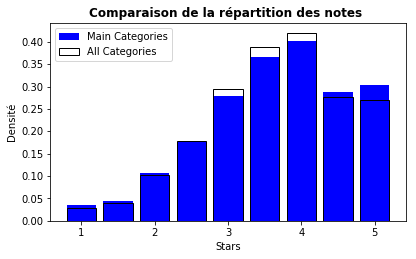

In [16]:
fig=plt.figure(figsize=(14,8))
bins=[1,1.5,2,2.5,3,3.5,4,4.5,5,5.5]
ax=fig.add_subplot(224)
ax.hist(stars_all_cat,bins=bins,normed=1,color="blue",rwidth=0.8,align='left')
plt.xlabel("Stars"),
ax=fig.add_subplot(224)
ax.hist(df.stars,bins=bins,normed=1,fill=False,rwidth=0.8,align='left')
plt.xlabel("Stars")
plt.ylabel("Densité")
plt.title("Comparaison de la répartition des notes ",fontweight='bold')
plt.legend(facecolor="white",labels=["Main Categories","All Categories"])
plt.show()

On voit que les histogrammes des notes se superposent quasiment. On peut donc se limiter seulement aux principales catégories.

Nous allons maintenant regarder la proportion de chacune des catégories principales et, pour chacune d'elles, la répartition des notes.

In [14]:
for cat in cat_pop:
    print("share of",cat,round(df[cat].mean(),2)*100,"%")
    print("note moyenne",round(df[df[cat]==1].stars.mean(),1))
#ATTENTION, la somme ne fait pas 100 (intersection entre chaque catégorie est non vide)

share of Restaurants 44.0 %
note moyenne 3.4
share of Shopping 23.0 %
note moyenne 3.7
share of Automotive 8.0 %
note moyenne 3.7
share of Nightlife 13.0 %
note moyenne 3.5
share of Active Life 7.000000000000001 %
note moyenne 4.1
share of Beauty & Spas 14.000000000000002 %
note moyenne 3.9
share of Home Services 13.0 %
note moyenne 3.7


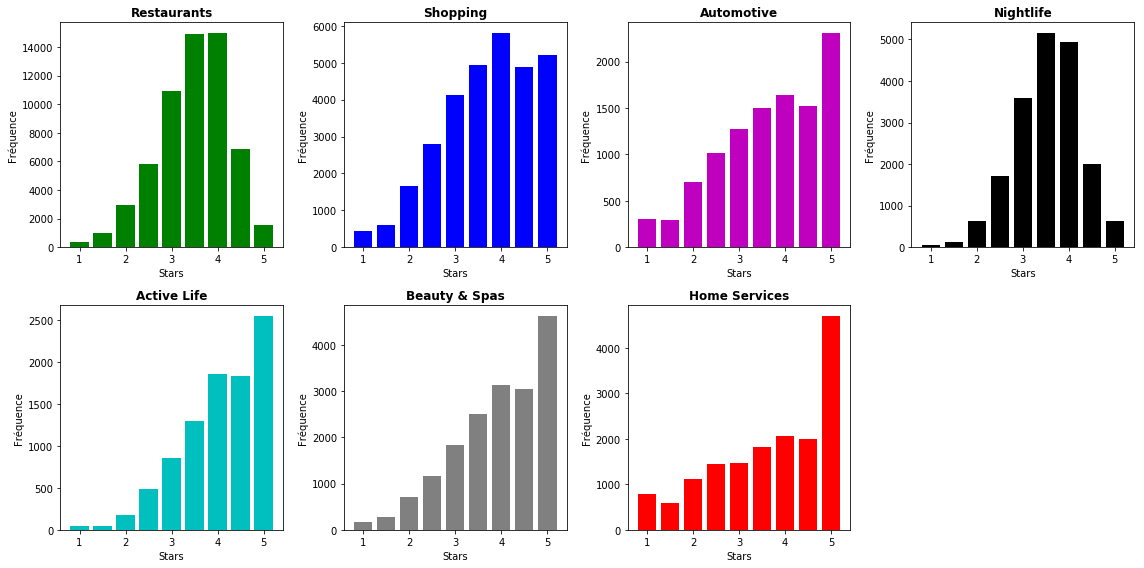

In [17]:
#Visualise la note moyenne des business par catégorie
cat_mat=df.stars
for cat in cat_pop:
    cat_mat=pd.concat([cat_mat,df[cat].apply(lambda x:cat if x==1 else "")],axis=1)

col=['g','b','m','k','c','grey','r']
fig=plt.figure(figsize=(16,8))
bins=[1,1.5,2,2.5,3,3.5,4,4.5,5,5.5]
for i in range(7):
    ax=fig.add_subplot(2,4,i+1)
    ax.hist(cat_mat[cat_mat[cat_pop[i]]==cat_pop[i]].stars,color=col[i],bins=bins,rwidth=0.8,align='left')
    plt.xlabel("Stars")
    plt.ylabel("Fréquence")
    plt.title(cat_pop[i],fontweight='bold')
plt.tight_layout()
plt.show()


On voit que l'on a quelques différences pour les notes selon les catégories. Par exemple, pour les restaurants et les boites de nuit, on a une note médiane vers 3.5 alors qu'elle se trouve plus vers 4.5 pour le service à domicile et les spas. Nous allons donc créer des variables catégorielles de type dummy que nous incluerons dans le modèle

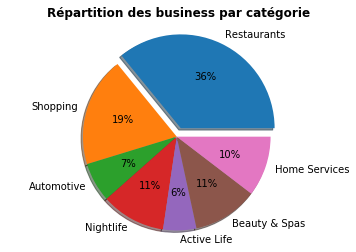

In [16]:
## Pie chart
cat_shares=df[cat_pop].mean()
plt.pie(cat_shares,explode=(0.1,0,0,0,0,0,0),labels=cat_pop,shadow=True,autopct='%1.0f%%')
plt.title('Répartition des business par catégorie',fontweight='bold')
plt.axis('equal')
plt.show()

Cette pie chart représente la part de chaque catégorie dans les données. Chaque observation pouvant prendre plusieurs catégories, la somme des pourcentages propres à chaque catégorie est supérieure à 100% (122% exactement).

In [18]:
#Combien de commerces prennent plusieurs catégories dans cat_pop, peut-on vraiment les ignorer ?
print("Commerces prenant au moins deux des catégories principales",100*round(len(df[df[cat_pop].sum(axis=1)>1])/len(df),2),"%")  #environ 20% des business ont > 1 catégorie dans cat_pop

Commerces prenant au moins deux des catégories principales 21.0 %


Une question que l'on pourrait se poser est: Est-ce que le nombre de commentaires ou de tips est corrélé avec la note?

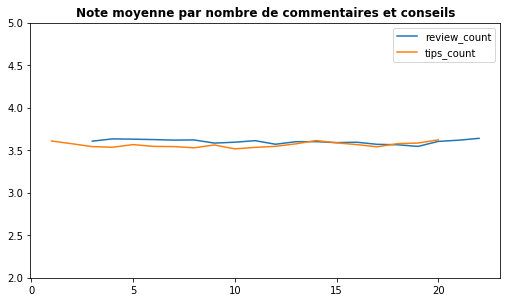

In [18]:
fig=plt.figure(figsize=(14,8))
ax=fig.add_subplot(224)
ax.plot(df[['review_count','stars']].groupby(by='review_count').mean()[:20])
plt.ylim(2,5)
ax=fig.add_subplot(224)
ax.plot(df[['count_tips','stars']].groupby(by='count_tips').mean()[:20])
plt.ylim(2,5)
plt.title('Note moyenne par nombre de commentaires et conseils',fontweight='bold')
plt.tight_layout()
plt.legend(facecolor='white',labels=['review_count','tips_count'])
plt.show()

Le nombre de commentaires et de conseils ne semble pas être significativement corrélé avec la note. Un commerce peut être à la fois peu fréquenté et très bien noté, ou inversement.

### Données spatiales

#### Visualisation des restaurants à Cleveland

In [10]:
data=df[(df.city=="Cleveland") & (df.Restaurants==1)]
data=data[['address','latitude','longitude','stars']]
data.index=range(0,len(data))
data['color']=data.stars.apply(lambda x:'red' if x<2.5 else 'green' if x>3.5 else 'orange')

In [11]:
import folium
from pyensae.notebook_helper import folium_html_map

CD_COORDINATES=[41.500933, -81.691004]

map = folium.Map(location=CD_COORDINATES, zoom_start=12)

for i in range(0,500):
    folium.Marker(location = [data.latitude[i],data.longitude[i]],icon=folium.Icon(color=data.color[i])).add_to(map)

map.save(outfile='map.html')
display(map)

En prenant l'exemple d'une ville comme Cleveland, on peut visualiser la répartition spatiale des restaurants de la ville en fonction de leur note. Bien que le résultat ne soit pas flagrant, on peut tout de même observer que les "bons" restaurants __<font color=green>en vert</font>__ ont tendance à être groupés ensemble et plus souvent dans des endroits à forte concentration, proche du centre ville. A l'inverse, les restaurants mal notés, __<font color=red> en rouge</font>__, sont plus souvent isolés et excentrés.

Une nouvelle variable pouvant expliquer les notes des commerces a été mise en place. Cette variable calcule si dans un rayon proche d'un commerce, il existe un commerce du même type.<br>

In [12]:
import pysal
from pysal.cg.kdtree import KDTree
df.index=range(0,len(df)) #reindex df
#On cherche le nombre de business appartenant à la meme catégorie au sein d'un certain rayon
loc_dict={}
index_dict={}
NbBusAround=pd.DataFrame()
for cat in cat_pop:
    loc_dict[cat]=list(zip(df[df[cat]==1]['latitude'],
                           df[df[cat]==1]['longitude']))
    index_dict[cat]=df[df[cat]==1].index
    tree = KDTree(loc_dict[cat], distance_metric='Arc', radius=pysal.cg.RADIUS_EARTH_MILES)
    indices = tree.query_ball_point(loc_dict[cat], 0.1)
    n_bus=[len(i) for i in indices]
    NbBusAround[cat]=pd.Series(n_bus)
    NbBusAround[cat+'_index']=pd.Series(index_dict[cat])

NbBusAround=NbBusAround.fillna(0)

In [13]:
#Intègre les dans df
for i in range(1,15,2):
    df_temp=NbBusAround.iloc[:,i-1:i]
    df_temp.index=NbBusAround.iloc[:,i].astype(int)
    df_temp.index.rename('index',inplace=True)
    if i != 1:
        df_temp=df_temp[df_temp.index !=0]
    df_temp[df_temp.columns[0]]=df_temp[df_temp.columns[0]].rename(df_temp.columns[0]+'_count_around',inplace=True)
    df=pd.concat([df_temp,df],axis=1)

In [14]:
df=df.fillna(0)
for i in range(0,7):
    df.columns.values[i]=df.columns.values[i]+'_count_around'

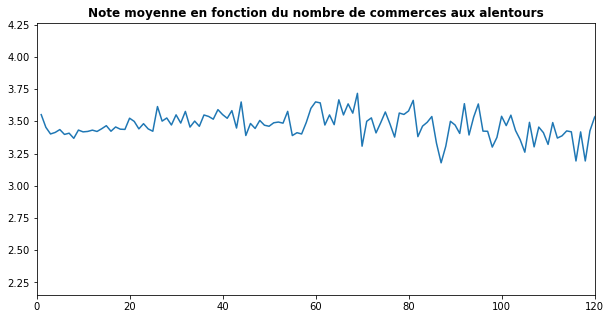

In [27]:
#Pour chaque catégorie, on regarde comment est répartie la densité de business en fonction de la note
plt.figure(figsize=(10,5))
plt.plot(df[df.Restaurants==1][['Restaurants_count_around','stars']].groupby(by='Restaurants_count_around').mean())
plt.xlim(0,120)
plt.title('Note moyenne en fonction du nombre de commerces aux alentours',fontweight='bold')
plt.show()

Là encore, il est difficile de trouver une corrélation entre le nombre de commerce de même catégorie aux alentours (autrement dit le niveau de concurrence) et la note moyenne.

In [16]:
df=df[df.is_open==1]  #on enleve les business fermés

In [18]:
#sauvegarde le dataframe traité
df.to_csv("clean_df_1.txt",sep=',')

In [22]:
df=pd.read_csv("clean_df_1.txt",sep=',')

## Modèles

Dans cette partie, nous allons travailler sur la prédiction des notes à partir des différentes variables disponibles dans notre dataframe. Pour cela, nous allons utiliser différents types de modèles pour prédire cette note afin d'identifier les modèles pertinents.

Nous allons commencer par séparer notre échantillon en deux parties: une partie d'entrainement, afin de fitter le modèle, et une partie de test afin de tester les performances de notre modèle. Nous allons aussi traiter nos données pour qu'elles soient du bon "type". Ici, nous considérons une classification multiclasses, chacune des 9 notes 1.0,1.5,..,5.0 représentant une catégorie.

### Préparation des données

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X=df.loc[:,df.columns != 'stars'].select_dtypes(include=['float','int']).fillna(0)
#On enlève certaines variables: longitude/latitude ne sont pas utiles pour notre problème
#count_words est directement corrélé avec count_review et count_tips
X=X.drop(["longitude","latitude","count_words","is_open"],axis=1)
Y=df.stars

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [224]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_test = lab_enc.fit_transform(y_test)
y_train= lab_enc.fit_transform(y_train)

In [22]:
X.head()

,Home Services_count_around,Beauty & Spas_count_around,Active Life_count_around,Nightlife_count_around,Automotive_count_around,Shopping_count_around,Restaurants_count_around,review_count,likes,count_tips,Restaurants,Shopping,Automotive,Nightlife,Active Life,Beauty & Spas,Home Services
2,0.0,0.0,0.0,2.0,0.0,0.0,6.0,21,0.0,5.0,1,0,0,1,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3,0.0,2.0,1,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,35.0,15,0.0,1.0,1,0,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6,0.0,2.0,1,0,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,26.0,45,0.0,5.0,1,0,0,0,0,0,0


#### Matrice de corrélation

Commençons par examiner la corrélation entre nos données, pour cela nous allons utiliser une matrice de corrélation.

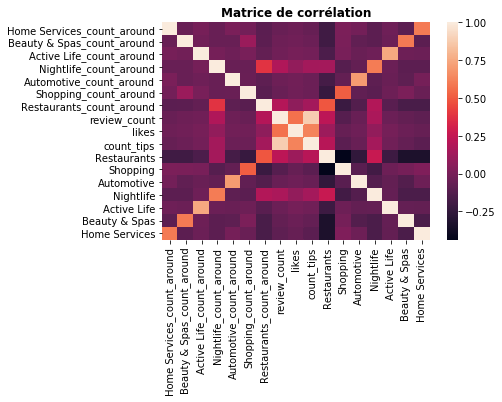

In [23]:
import seaborn as sns
%matplotlib inline
corr = X.corr()
ax = plt.axes()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,ax=ax)
ax.set_title("Matrice de corrélation",fontweight='bold')
plt.show()

* Review_count et count_tips sont assez fortement corrélés. Ce qui est logique étant donné qu'un commerce très commenté fera aussi l'objet d'un plus grand nombre de conseils.
* Chaque variable catégorielle est également fortement corrélée avec le nombre de commerces environnant de la même catégorie.

#### On s'intéresse à la baseline, laquelle sera comparée aux performances des modèles

On définit la baseline de la manière suivante: on prédira toujours la note la plus représentée dans les données: 4.0 sur 5.0. Le but du modèle sera de prédire avec plus de précision que la baseline.

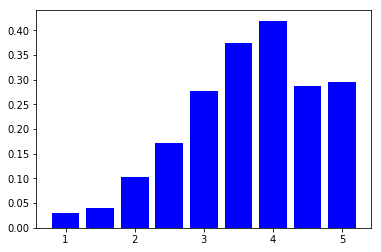

In [130]:
#Observons la répartition des notes
bins=[1,1.5,2,2.5,3,3.5,4,4.5,5,5.5]
plt.hist(Y,normed=1,bins=bins,color="blue",rwidth=0.8,align='left')
plt.show()

In [187]:
#BASELINE: prédiction sur la note la plus présente: 4.0 sur 5.0
notes=[0,0.5,1.0]
temp=np.zeros(3)
for ind in range(3):
    if notes[ind]==0:
        temp[ind]=len(Y[Y==4.0])/len(Y)
    elif notes[ind]>1.0:
        temp[ind]=temp[ind-1]+len(Y[Y==4.0-notes[ind]])/len(Y)
    else:    
        temp[ind]=temp[ind-1]+len(Y[Y==4.0+notes[ind]])/len(Y)+len(Y[Y==4.0-notes[ind]])/len(Y)
    print("tolérance, écart/vraie note:",notes[ind],"- Prédictions correctes:",round(temp[ind]*100,2),"%")

tolérance, écart/vraie note: 0 - Prédictions correctes: 20.96 %
tolérance, écart/vraie note: 0.5 - Prédictions correctes: 54.08 %
tolérance, écart/vraie note: 1.0 - Prédictions correctes: 82.7 %


#### On définit une fonction pour représenter graphiquement l'erreur de prédiction

In [188]:
def plot_perf(mat,y_pred,y_test):
    fig=plt.figure(figsize=(15,8))
    ax=fig.add_subplot(221)
    x=[0,0.5,1]
    y=np.ones(3)
    y[0]=round(100*np.trace(mat)/len(y_test),2)
    y[1]=y[0]+round(100*(sum(conf.diagonal(1))+sum(conf.diagonal(-1)))/len(y_test),2)
    y[2]=y[1]+round(100*(sum(conf.diagonal(2))+sum(conf.diagonal(-2)))/len(y_test),2)
    #y[3]=y[2]+round(100*(sum(conf.diagonal(3))+sum(conf.diagonal(-3)))/len(y_test),2)
    #y[4]=y[3]+round(100*(sum(conf.diagonal(4))+sum(conf.diagonal(-4)))/len(y_test),2)
    ax.plot(x,y)
    #Baseline: précision en prédisant toujours la note du médiane 3.0
    ax.plot(x,temp*100,'r--')
    plt.xticks(np.arange(0,1.5,0.5))
    plt.ylim(0,100)
    plt.xlim(0,1.0)
    plt.title("Taux de prédiction du modèle par tranche de précision",fontweight='bold')
    plt.xlabel('Distance par rapport à la vraie note')
    plt.ylabel("% de prédictions correctes")
    plt.legend(["modèle","baseline"])
    plt.grid()
    plt.show()

### K-Means

Un premier modèle auquel nous avions pensé est le k-means, en faisant l'hypothèse que chacune des 9 catégories de notes représente un cluster et que l'algorithme soit capable de segmenter ces clusters.

In [183]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [184]:
kmeans = KMeans(n_clusters=9)
kmeans = kmeans.fit(X_train,y_train)
y_pred=kmeans.predict(X_test)

In [185]:
"CONFUSION MATRIX"
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
print(conf)

[[ 790    0    1    0    0    0   11    0    0]
 [ 692    1    2    0    0    0   23    0    0]
 [1429    0    3    0    0    1   27    0    0]
 [1963    0    6    0    0    0   52    1    0]
 [2455    0   13    0    0    0   96    3    1]
 [3231    2   24    0    0    2  192    6    1]
 [3900    5   48    1    0    2  339   10    1]
 [3670    1   68    0    0    0  459    6    0]
 [7585    0   52    0    0    0  311    6    0]]


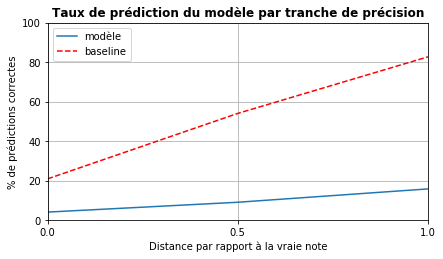

In [189]:
plot_perf(conf,y_test,y_pred)

Ce graphique illustre la capacité du modèle à prédire des notes proches de la vraie note. La ligne __<font color=blue>bleue</font>__ représente les performances du modèle considéré. La ligne __<font color=red>rouge pointillée</font>__ représente les performances dans un modèle simpliste pour lequel on prédirait toujours la note du milieu (3.0 sur 5.0), la "baseline".

Un bon modèle sera donc au-dessus de la ligne rouge, au moins pour les distances très proches de la vraie note (exactement égale, +/-0.5 ou +/-1.0 point d'écart). Dans le cas du KMeans ci-dessus, le modèle est toujours moins performance que la baseline, on aurait alors intérêt à prédire toujours la note du milieu plutôt que de se fier au KMeans.

In [ ]:
print("Performance par classe du Kmeans \n",classification_report(y_test,y_pred))

Ce modèle est à oublier, il ne prédit rien, sûrement parce que les données explicatives ne sont pas suffisamment regroupées en fonction des notes.

### Random Forest

Se baser sur un type de modèle "arbre" semble adapté à notre problème, étant donné que nous traitons des observations non linéaires.

Le random forest permet de créer un nombre important d'arbres (forêt) sur des données différentes puis en comparant ces arbres, il permet d'obtenir une classification.

In [225]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test) #prediction

In [227]:
"CONFUSION MATRIX"
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
print(conf)

[[  29    3   17   24   29   48   29   22  199]
 [   3   45   27   53   66   96   72   69  139]
 [  17   18  196   84  179  211  275  139  298]
 [   9   37   86  467  274  475  365  223  394]
 [  20   43  124  213 1079  645  765  355  542]
 [  21   39  132  302  600 1907  969  460  707]
 [  19   52  168  273  649 1020 2198  582  776]
 [  13   37  108  192  438  667  770 1091  704]
 [  24   39   92  131  257  464  493  465 2131]]


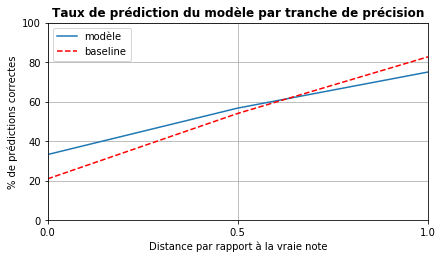

In [228]:
plot_perf(conf,y_pred,y_test)

In [229]:
print("Performance par classe du classifieur Random Forest \n",classification_report(y_test,y_pred))

Performance par classe du classifieur Random Forest 
              precision    recall  f1-score   support

          0       0.19      0.07      0.10       400
          1       0.14      0.08      0.10       570
          2       0.21      0.14      0.17      1417
          3       0.27      0.20      0.23      2330
          4       0.30      0.28      0.29      3786
          5       0.34      0.37      0.36      5137
          6       0.37      0.38      0.38      5737
          7       0.32      0.27      0.29      4020
          8       0.36      0.52      0.43      4096

avg / total       0.32      0.33      0.32     27493



Le modèle random forest a des performances supérieures à la baseline pour une prédiction exacte de la note, et une précision légèrement inférieure à +/- 0.5 d'écart par rapport à la vraie note. Le modèle est donc utile pour prédire une note exacte.

#### Optimisation des hyper-paramètres

Nous allons maintenant essayer d'optimiser ce modèle en faisant varier le nombre d'abres de notre modèle afin d'améliorer ses performances.

In [230]:
from sklearn import grid_search
parameters_RF = {'n_estimators':list(np.arange(5,25))}
clf1=grid_search.GridSearchCV(RandomForestClassifier(), parameters_RF)
clf1.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [231]:
best_parameters, score, _ = max(clf1.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters_RF.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

n_estimators: 23


On a donc un modèle optimisé pour le random forest pour un nombre d'arbre de 23 (mais ce nombre peut varier selon l'échntillon d'apprentissage que l'on a et donc la précision du modèle varie aussi selon ce set d'apprentissage). Nous allons donc travailler avec ce nombre d'arbres afin d'avoir de meilleur résultat.

In [232]:
score

0.3079972841242513

In [233]:
y_pred_opt=clf1.predict(X_test)

In [234]:
"CONFUSION MATRIX"
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred_opt)
print(conf)

[[  29    5   16   22   30   48   33   26  191]
 [   2   45   27   50   62  100   81   64  139]
 [  19   14  194   85  182  227  253  139  304]
 [   8   41   75  490  259  461  370  233  393]
 [   6   38  110  211 1091  681  751  367  531]
 [  14   48  113  274  552 1913 1011  505  707]
 [  12   49  147  255  639  982 2270  581  802]
 [  20   44  100  170  397  626  807 1138  718]
 [  21   45   90  110  263  465  510  485 2107]]


In [235]:
print("Performance par classe du classifieur Random Forest \n",classification_report(y_test,y_pred_opt))

Performance par classe du classifieur Random Forest 
              precision    recall  f1-score   support

          0       0.22      0.07      0.11       400
          1       0.14      0.08      0.10       570
          2       0.22      0.14      0.17      1417
          3       0.29      0.21      0.25      2330
          4       0.31      0.29      0.30      3786
          5       0.35      0.37      0.36      5137
          6       0.37      0.40      0.38      5737
          7       0.32      0.28      0.30      4020
          8       0.36      0.51      0.42      4096

avg / total       0.33      0.34      0.33     27493



On voit donc qu'avec ce modèle "optimisé", on a des performances meilleures que précédemment mais à peine mieux qui permettent d'atteindre 33% de précision mais selon les simulations on peut atteindre jusqu'à 37% de précision soit plus du tiers des notes bien prédites. Avec ce modèle optimisé, on a un rappel qui reste quasiment (34%) le même et est très important pour la note 5 alors que pour les autres notes, il a augmenté. En regardant la précision, on voit qu'avec ce modèle on a diminué la précision pour la note de 1 mais elle a augmenté sur les autres notes ce qui permet d'avoir une précison globale meilleure.

### Decision Tree Classifier

L'arbre de décision nous semble une bonne solution dans notre cas, puisqu'il permet à l'aide d'un ensemble de choix sur nos données de prédire les catégories de notes  qui se retrouveront aux branches de notre arbre.

In [195]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test) #prediction

In [196]:
"CONFUSION MATRIX"
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[  68    3   42   41  111  219   64   34  220]
 [  14   85   54   50  129  171   64   47  104]
 [  18   16  284   86  252  224  144   68  368]
 [  32   24  115  520  258  508  126  133  306]
 [  23   30  185  158  947  302  270  186  467]
 [  54   40  186  290  427 1387  295  279  500]
 [  15   59  282  284  692  532 1147  365  930]
 [  24   67  278  304  528  784  418 1122  679]
 [ 167   75  410  435 1205 1619  607  721 2715]]


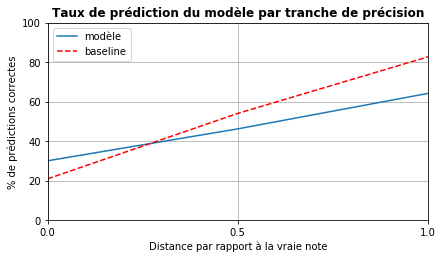

In [197]:
plot_perf(conf,y_test,y_pred)

On voit que le modèle basé sur arbre de décision a des performances similaires à Random Forest.

In [44]:
print("Performance par classe du classifieur Decision Tree \n",classification_report(y_test,y_pred))

Performance par classe du classifieur Decision Tree 
              precision    recall  f1-score   support

          0       0.12      0.07      0.09       436
          1       0.13      0.11      0.12       557
          2       0.16      0.17      0.16      1350
          3       0.23      0.21      0.22      2420
          4       0.30      0.29      0.29      3830
          5       0.35      0.36      0.35      5159
          6       0.37      0.36      0.36      5728
          7       0.32      0.26      0.29      3877
          8       0.38      0.49      0.43      4136

avg / total       0.32      0.32      0.32     27493



On voit que ce modèle basé sur le Decision Tree a en moyenne des performances satisfaisante sur la précision et le rappel avec environ un tiers des notes bien prédites. On remarque qu'on a encore la note de 5 avec un rappel très élevé.

### Knn

Dans notre étude, on dispose d’une base de données d'apprentissage constituée de N couples « entrée-sortie ». On peut donc penser à faire un modèle basé sur le Knn. Pour estimer la sortie associée à une nouvelle entrée x, la méthode des k plus proches voisins consiste à prendre en compte (de façon identique) les k échantillons d'apprentissage dont l’entrée est la plus proche de la nouvelle entrée x, selon une distance à définir.


Dans notre problème de classification, on retiendra la classe de note la plus représentée parmi les k sorties associées aux k entrées les plus proches de la nouvelle entrée x.

In [198]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh = neigh.fit(X_train,(y_train).round(0))
y_pred=neigh.predict(X_test)

In [199]:
"CONFUSION MATRIX"
from sklearn.metrics import confusion_matrix
conf = confusion_matrix((y_test).round(0), (y_pred).round(0))
print(conf)

[[  67    8   41   79   44   60   58   45  400]
 [  26   58   60   74   67   63   76   80  214]
 [  26   35  237  116  118  118  134  158  518]
 [  50   49  149  406  146  185  169  212  656]
 [  41   53  231  252  498  235  304  280  674]
 [  60   67  234  384  283  586  348  440 1056]
 [  45   73  382  393  440  415  834  587 1137]
 [  47   93  278  351  398  448  520 1014 1055]
 [ 136  120  586  746  495  547  686 1000 3638]]


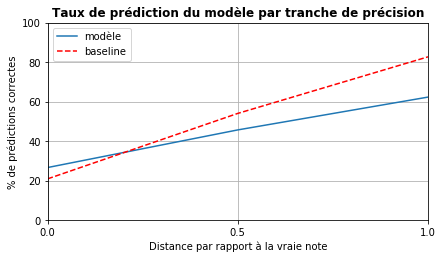

In [200]:
plot_perf(conf,y_test,y_pred)

Les performances sont inférieures à celles des modèles de type arbre.

In [48]:
print("Performance par classe du classifieur Knn \n",classification_report(y_test,y_pred))

Performance par classe du classifieur Knn 
              precision    recall  f1-score   support

          0       0.06      0.13      0.08       436
          1       0.05      0.09      0.06       557
          2       0.08      0.15      0.10      1350
          3       0.12      0.15      0.13      2420
          4       0.20      0.21      0.20      3830
          5       0.27      0.25      0.26      5159
          6       0.28      0.25      0.27      5728
          7       0.22      0.15      0.18      3877
          8       0.35      0.29      0.32      4136

avg / total       0.24      0.22      0.23     27493



### Logistic Regression

La régression logisitique nous parait être un choix peu judicieux dans notre cas puisque l'on travaille sur un problème de classification non linéaire. Nous allons tout de même vérifier que la régression logistique n'est pas adaptée pour ce type d'étude.

In [201]:
from sklearn import linear_model

In [202]:
lr = linear_model.LogisticRegression(penalty='l2')
lr = lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [203]:
"CONFUSION MATRIX"
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
print(conf)

[[   0    0    0    0    0    4   23    2  773]
 [   0    0    0    0    0   13   65    0  640]
 [   0    0    0    0    0   38  142    6 1274]
 [   0    0    0    0    0   81  212    9 1720]
 [   0    0    0    1    0  153  354   24 2036]
 [   0    0    0    0    0  195  521   35 2707]
 [   0    0    0    1    0  232  752   43 3278]
 [   0    0    0    2    0  187  692   57 3266]
 [   0    0    0    0    0  121  387   33 7413]]


On voit tout de suite que la régression logistique ne prédit quasiment que 4 notes sur un ensemble de 9 notes possibles. Ce qui montre bien que la régression logisitique n'est pas adaptée à ce type de problème.

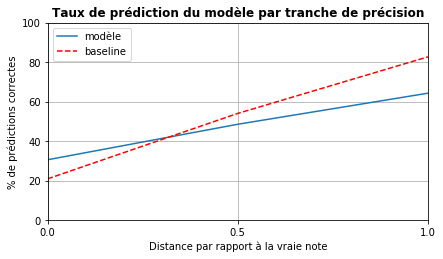

In [204]:
plot_perf(conf,y_test,y_pred)

Sur l'ensemble de nos modèles testés, le random forest obtient les meilleures performances.

Nous vérifions que le modèle n'est pas victime du problème de surapprentissage en effectuant une validation croisée:

### Cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf=KFold(n_splits=4)
kf.get_n_splits(X)
outcomes=[]

#splits the dataset in several parts with both test and train, and runs the model on each part"
for train_index, test_index in kf.split(X):
    X_train,X_test=X.values[train_index],X.values[test_index]
    y_train,y_test=Y.values[train_index],Y.values[test_index]
    y_train= lab_enc.fit_transform(y_train)
    y_test = lab_enc.fit_transform(y_test)
    clf.fit(X_train,y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    outcomes.append(accuracy)
print(outcomes)

Sur l'ensemble des parties entrainées et testées lors de la validation croisée,le taux de précision est proche voir supérieure par rapport au test initial. Le modèle est donc généralisable à d'autres données de même type.

### Simplification du problème en classification binaire

Vu les prédictions obtenues on pourrait séparer la note de 5 des autres notes puisqu'au niveau du rappel, la note de 5 est toujours bien plus élevée que les autres. Nous allons donc travailler avec un problème binaire soit la note est de 5 soit elle ne l'est pas.

In [236]:
def bin_transformation(x):
    if x==8: #8 équivaut à la note de 5
        return("1")
    else:
        return("0")

In [237]:
import numpy as np
f = np.vectorize(bin_transformation)
y_train_bin=f(y_train)
y_test_bin=f(y_test)

In [238]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train_bin)
y_pred_bin=clf.predict(X_test) #prediction

In [239]:
"CONFUSION MATRIX"
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test_bin,y_pred_bin)
print(conf)

[[22448   949]
 [ 3168   928]]


/Users/antoinegrelety/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  This is separate from the ipykernel package so we can avoid doing imports until


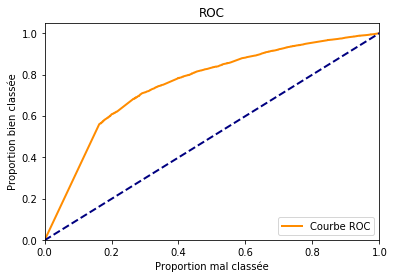

In [240]:
from sklearn.metrics import roc_curve
y_proba=clf.predict_proba(X_test)
prob_pred = [y_proba[i, c] for i, c in enumerate(y_pred_bin)]
fpr, tpr, th = roc_curve((y_pred_bin == y_test_bin).ravel(),prob_pred)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Courbe ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proportion mal classée")
plt.ylabel("Proportion bien classée")
plt.title('ROC')
plt.legend(loc="lower right")

In [241]:
print("Performance par classe du classifieur Random Forest \n",classification_report(y_test_bin,y_pred_bin))

Performance par classe du classifieur Random Forest 
              precision    recall  f1-score   support

          0       0.88      0.96      0.92     23397
          1       0.49      0.23      0.31      4096

avg / total       0.82      0.85      0.83     27493



On voit qu'en simplifiant le problème à un problème binaire, on a de biens meilleurs résultats en moyenne mais en regardant la note de 5, on n'a qu'environ 50% de précision et 23% de rappel ce qui est faible pour un problème binaire puisque l'on ne peut en retirer l'information que la note est 5 ou non et avec ces prédictions on risque de se tromper la plupart du temps.

On voit que sur l'ensemble de nos modèles, les résultats sont un peu justes pour exploitater les modèles de manière opérationnelle. Ceci est peut-être dû au fait que les variables utilisées jusqu'à présent ne sont pas suffisamment corrélées avec la note.

Nous allons considérer une autre approche: l'exploitation des données textuelles dans la variable "tips".

## Prédiction avec une approche NLP

Certaines parties de ce code sont tirées du tutoriel suivant:
https://www.analyticsvidhya.com/blog/2017/04/natural-language-processing-made-easy-using-spacy-%E2%80%8Bin-python/

Dans cette partie, nous allons utiliser un autre type de données. Nous allons exploiter les conseils laissés par les utilisateurs de Yelp sur le commerce et à l'aide du module Spacy, prédire si ces commentaires sont plutôt bons ou mauvais à l'aide des capacités d'analyse de sentiments de Spacy. Ainsi, on pourrait déterminer d'une autre manière les notes.

### Préparation des données

A partir du module Spacy, nous allons créer des fonctions qui permettront d'identifier les éléments d'évaluation les plus mentionnés par les utilisateurs, appelés tokens. D'autres fonction vont ensuite les transformer en vecteurs de features, lesquels seront utilisés pour l'exercice de classification.

Pour des raisons de temps de calcul, nous allons nous contenter de la catégorie "Restaurants" et des commentaires à partir de 2016 ayant un nombre de mots supérieurs à 5 dans ce module.

Les données utilisées sont des observations au niveau "client" et non pas au niveau "commerce" comme précédemment. La note à prédire n'est donc plus la note moyenne du commerce mais la note exacte évaluée par le client.

In [54]:
#Sauvegarde les données traitées
#df_tips=pd.merge(df[["Restaurants","business_id"]],df_tips,on='business_id',how='left')
#df_tips['count_words']=df_tips.text.apply(lambda x:len(x.split()))
#df_tips=df_tips[df_tips.Restaurants==1 & df_tips.date > '2016-01-01' & df_tips.count_words > 4]
#df_tips.to_csv("clean_tips.csv",sep=",")

### Création du modèle

In [205]:
#Charge les données traitées
df_tips=pd.read_csv("clean_tips.csv",sep=",")
df_tips.index=range(0,len(df_tips))
df_tips.stars=lab_enc.fit_transform(df_tips.stars)
train=[]
#Extraie des indices aléatoirement pour créer les bases train et test
n_train=int(len(df_tips)*(2/3))
n_tips=len(df_tips)
ind_tips=np.arange(0,n_tips)
np.random.shuffle(ind_tips)
ind_train=ind_tips[0:n_train]
#Les bases train et test sont en fait des ensembles de string concaténés avec leur note respective
for i in ind_train:
    train.append(tuple((df_tips.text[i],str(df_tips.stars[i]))))
test=[]
ind_test=ind_tips[n_train:n_tips]
for i in ind_test:
    test.append(tuple((df_tips.text[i],str(df_tips.stars[i]))))
    y_test=lab_enc.fit_transform([x[1] for x in test])

In [206]:
import spacy
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

nlp = spacy.load("en")
noisy_pos_tags = ["PROP"]
min_token_length = 2

#Fonction qui teste si le token est bruité ou non
def isNoise(token):     
    is_noise = False
    if token.pos_ in noisy_pos_tags:
        is_noise = True 
    elif token.is_stop == True:
        is_noise = True
    elif len(token.string) <= min_token_length:
        is_noise = True
    return is_noise 
def cleanup(token, lower = True):  #transforme le texte en lower case
    if lower:
       token = token.lower()
    return token.strip()

import string
punctuations = string.punctuation

spacy.load('en')
from spacy.lang.en import English
parser = English()

#Custom transformer avec spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Fonction qui enlève le bruit du texte
def clean_text(text):     
    return text.strip().lower()

#Crée un tokenizer qui parcourt chaque phrase et génère les tokens associés
def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]
    return tokens

lab_enc = preprocessing.LabelEncoder()
#crée un objet tokenizer qui genere le vecteur des features, sur lequel on appliquera un modèle de classification
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

### Classification à partir des tokens vectorisés

#### Linear SVC

In [207]:
#On crée une pipeline Spacy qui nettoie (enlève le bruit), transforme les mots en vecteurs,
#et classifie les commentaires selon leur note
classifier = LinearSVC()
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Crée modèle et mesure précision
pipe.fit([x[0] for x in train], [x[1] for x in train]) 
pred_data = pipe.predict([x[0] for x in test]) 

print("Accuracy:", accuracy_score([x[1] for x in test], pred_data))

lab_enc = preprocessing.LabelEncoder()
pred_data= lab_enc.fit_transform(pred_data)

Accuracy: 0.416829907005


In [208]:
"CONFUSION MATRIX"
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,pred_data)
print(conf)

[[    4     3     2     2     7    12    16     2     0]
 [    4    12    10     9    31    44    82    14     1]
 [    2    14    38    33    72   131   295    51     3]
 [    2    14    27   254   136   381   999   134     6]
 [    3     8    38    76   723   932  2803   389    13]
 [    4     6    25   117   462  2811  6550  1101    22]
 [    2    17    43   152   550  2135 13665  1939    47]
 [    2     5    19    52   216   928  6433  2637    25]
 [    1     0     0     2    18    49   400   159    71]]


In [209]:
from sklearn.metrics import classification_report
print("Performance par classe du classifieur Linear SVC \n",classification_report(y_test,pred_data))

Performance par classe du classifieur Linear SVC 
              precision    recall  f1-score   support

          0       0.17      0.08      0.11        48
          1       0.15      0.06      0.08       207
          2       0.19      0.06      0.09       639
          3       0.36      0.13      0.19      1953
          4       0.33      0.15      0.20      4985
          5       0.38      0.25      0.30     11098
          6       0.44      0.74      0.55     18550
          7       0.41      0.26      0.31     10317
          8       0.38      0.10      0.16       700

avg / total       0.40      0.42      0.38     48497



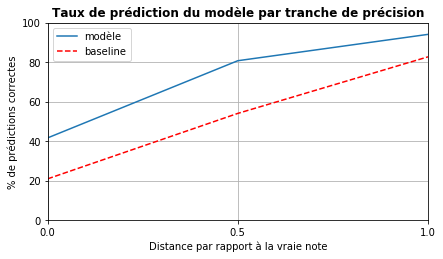

In [210]:
plot_perf(conf,y_test,pred_data)

In [78]:
for (sample, pred) in zip(test[:10], pred_data[:10]):
    print(sample, pred)

('Best prime rib!!!\nAt good $$$ price', '6') 6
("Who doesn't love a big ass long hair in their breakfast  burrito?", '3') 7
("Food was excellent and priced well. We'll definitely be back.", '7') 6
('Very unorganized and service is really slow.', '2') 6
('Tacos are dam good the el pastor is pretty dam tasty !!', '6') 7
('Absolutely love this restaurant! Food is always good, fresh, and very well seasoned.', '5') 6
('An extremely friendly and inviting place. Food is fantastic.', '7') 7
('Food was good.  Got to sit at a table near the front window- great people watching!', '5') 5
('There is a $10 off $20 lunch coupon and a $15 off $30 coupon in the 2016-17 Bucky Book.', '5') 5
('FYI - no more happy hour', '7') 6


#### Logistic Regression

In [211]:
classifier_lr=LogisticRegression()
pipe_lr= Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier_lr)])

# Create model and measure accuracy
pipe_lr.fit([x[0] for x in train], [x[1] for x in train]) 
pred_data = pipe_lr.predict([x[0] for x in test]) 

print("Accuracy:", accuracy_score([x[1] for x in test], pred_data))

pred_data= lab_enc.fit_transform(pred_data)

Accuracy: 0.415840155061


In [212]:
"CONFUSION MATRIX"
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,pred_data)
print(conf)

[[    0     1     3     1     7    11    21     4     0]
 [    0     4     7     3    31    47   102    13     0]
 [    0    10    22    28    52   131   358    38     0]
 [    0     6    22   138   107   418  1154   106     2]
 [    0     3    12    57   479   952  3152   327     3]
 [    1     2     8    47   289  2587  7245   915     4]
 [    0     3    10    41   300  1974 14532  1683     7]
 [    0     1     5    14   111   803  7004  2372     7]
 [    0     0     0     1     6    50   456   154    33]]


In [213]:
from sklearn.metrics import classification_report
print("Performance par classe du classifieur Logistic Regression \n",classification_report(y_test,pred_data))

Performance par classe du classifieur Logistic Regression 
              precision    recall  f1-score   support

          0       0.00      0.00      0.00        48
          1       0.13      0.02      0.03       207
          2       0.25      0.03      0.06       639
          3       0.42      0.07      0.12      1953
          4       0.35      0.10      0.15      4985
          5       0.37      0.23      0.29     11098
          6       0.43      0.78      0.55     18550
          7       0.42      0.23      0.30     10317
          8       0.59      0.05      0.09       700

avg / total       0.40      0.42      0.36     48497



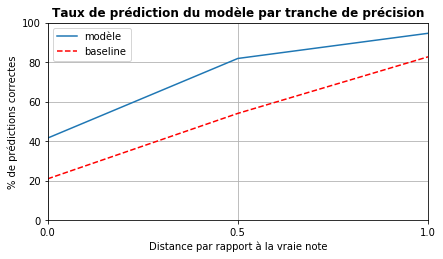

In [214]:
plot_perf(conf,y_test,pred_data)

Le modèle NLP avec une Logistic Regression prédit plus de 40% des notes exactement et plus de 80% des notes à +/- 0.5 près. Ce modèle surpasse les autres modèles de Machine Learning "classique" n'exploitant pas les données textuelles. On note aussi que les performances surpassent la baseline contrairement aux modèles de la première partie pour la note exacte et une note à +/- 0.5 et +/- 1 près.

#### SGD classifier

In [215]:
from sklearn.linear_model import SGDClassifier
classifier_sgd=SGDClassifier()
pipe_sgd= Pipeline([("cleaner", predictors()),
                     ('vectorizer', vectorizer),
                     ('classifier', classifier_sgd)])

# Create model and measure accuracy
pipe_sgd.fit([x[0] for x in train], [x[1] for x in train])
pred_data = pipe_sgd.predict([x[0] for x in test])
print("Accuracy:", accuracy_score([x[1] for x in test], pred_data))
pred_data= lab_enc.fit_transform(pred_data)

Accuracy: 0.374559251088


In [216]:
"CONFUSION MATRIX"
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,pred_data)
print(conf)

[[    0     2     3     2     6    19    11     5     0]
 [    3     7     6    12    24    74    66    15     0]
 [    1    10    31    29    48   220   253    44     3]
 [    3     8    40   158   104   628   866   142     4]
 [    1     5    36    99   412  1445  2547   425    15]
 [    4    10    38   174   328  3429  6011  1076    28]
 [    5    18    59   185   449  3724 12102  1963    45]
 [    1     4    25    96   215  1764  6181  1994    37]
 [    0     0     2     4    10    98   416   138    32]]


In [217]:
from sklearn.metrics import classification_report
print("Performance par classe du classifieur SGD classifier \n",classification_report(y_test,pred_data))

Performance par classe du classifieur SGD classifier 
              precision    recall  f1-score   support

          0       0.00      0.00      0.00        48
          1       0.11      0.03      0.05       207
          2       0.13      0.05      0.07       639
          3       0.21      0.08      0.12      1953
          4       0.26      0.08      0.13      4985
          5       0.30      0.31      0.30     11098
          6       0.43      0.65      0.51     18550
          7       0.34      0.19      0.25     10317
          8       0.20      0.05      0.07       700

avg / total       0.34      0.37      0.34     48497



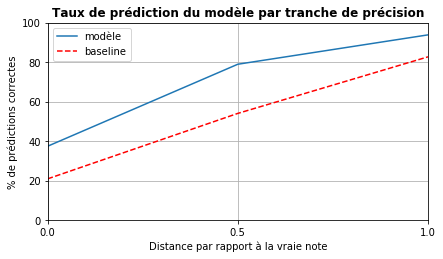

In [218]:
plot_perf(conf,y_test,pred_data)

Les performances du SGD Classifier sont inférieures à celles de la Logistic Regression.

## CONCLUSION

Nous avons proposé une démarche permettant de modéliser les notes moyennes des commerces. Nous avons transformé les données brutes afin de pouvoir "numériser" l'information et à les intégrer dans nos modèles de prédiction.<br>

Nous proposons deux approches pour prédire les notes:<br>
    -La première consiste à traiter un problème de machine learning classique de prédiction multiclasses à l'aide de diverses variables numériques. Les modèles de type "arbre" Decision Tree et Random Forest rendent les meilleurs résultats. Ils prédisent correctement environ un tiers des notes, et envrion 55% des notes à +/- 0.5 près.<br>
    -La deuxième approche consiste à exploiter les données textuelles des conseils laissés par les utilisateurs Yelp à l'aide de modèles de Natural Language Processing (NLP). Nous utilisons pour cela la librairie Spacy permettant de traiter et de vectoriser les mots clés. Parmi les modèles testés, la régréssion logistique rend les meilleurs résultats avant environ 40% des notes prédites parfaitement et 80% à +/-0.5 près.<br>
Avec les performances actuelles, notre modèle semble un peu limité pour être exploitable de manière opérationelle. Au vu de notre étude, un meilleur modèle pourrait être mis en place en exploitant les données des commentaires utilisateurs à condition d'avoir de plus grandes ressources de calcul.<br>
    Le modèle pourra avoir une durée de vie importante dans la mesure où Yelp ne change pas le format de ses données. Cependant nous avons rapidement constaté que le coût de temps de calcul est un problème crucial, notamment pour les modèles de NLP. Nous avons été amené à laisser de côté une partie des données afin de limiter le temps de calcul.<br>

Les modèles utilisés pourraient être améliorés en exploitant la base de données des commentaires à l'aide d'unités de calcul plus performantes. Nous pourrions également exploiter certaines variables de manière plus appropriées.